In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(df.shape)
df.describe()

(545, 13)


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
plt.style.use('ggplot')

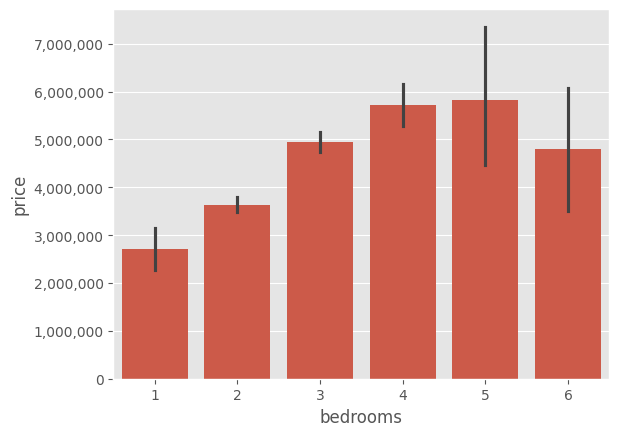

In [6]:
import matplotlib.ticker as mticker
sns.barplot(df,x ='bedrooms',y ='price')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

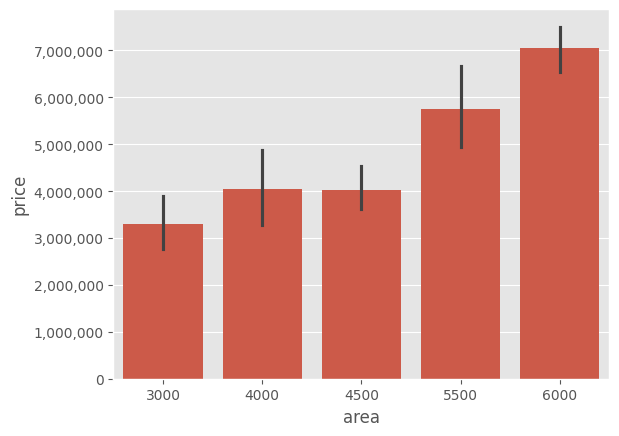

In [7]:
max_data = df[df['area'].isin(df['area'].value_counts().index[:5])]
sns.barplot(max_data,x = 'area', y = 'price')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

In [8]:
df.select_dtypes('object').head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [9]:
# Which Are Able to apply label encoder and which are apply onehotenocder
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']
for col in cols:
    print(f'\n\n{col} : ',df[col].value_counts())



mainroad :  mainroad
yes    468
no      77
Name: count, dtype: int64


guestroom :  guestroom
no     448
yes     97
Name: count, dtype: int64


basement :  basement
no     354
yes    191
Name: count, dtype: int64


hotwaterheating :  hotwaterheating
no     520
yes     25
Name: count, dtype: int64


airconditioning :  airconditioning
no     373
yes    172
Name: count, dtype: int64


prefarea :  prefarea
no     417
yes    128
Name: count, dtype: int64


furnishingstatus :  furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [11]:
labelEncoder = LabelEncoder()
oneEncoder = OneHotEncoder(sparse_output=False)
for col in cols:
    if col == 'furnishingstatus':
        furnishing_encoded  = oneEncoder.fit_transform(df[[col]])
        furnishing_encoded_df = pd.DataFrame(furnishing_encoded, columns=oneEncoder.get_feature_names_out([col]))
        df = pd.concat([df, furnishing_encoded_df], axis=1)
        df.drop('furnishingstatus',axis=1,inplace=True)
    else:
        df[col] = labelEncoder.fit_transform(df[col])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0


In [13]:
X = df.drop('price',axis=1)
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 14), (164, 14), (381,), (164,))

In [28]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report,confusion_matrix,r2_score

-------------Model LinearRegression-------------
Accuracy --:  0.6463350878895877


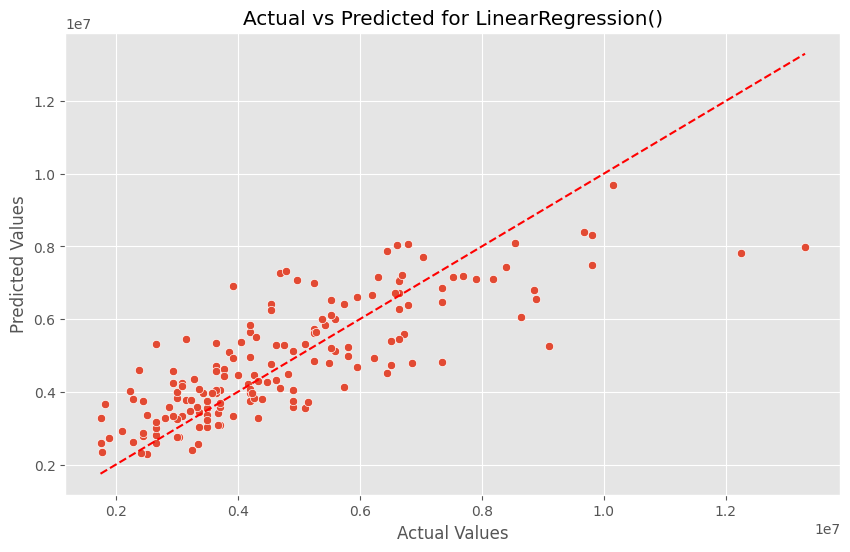

-------------Model LogisticRegression-------------
Accuracy --:  0.09905737314200702


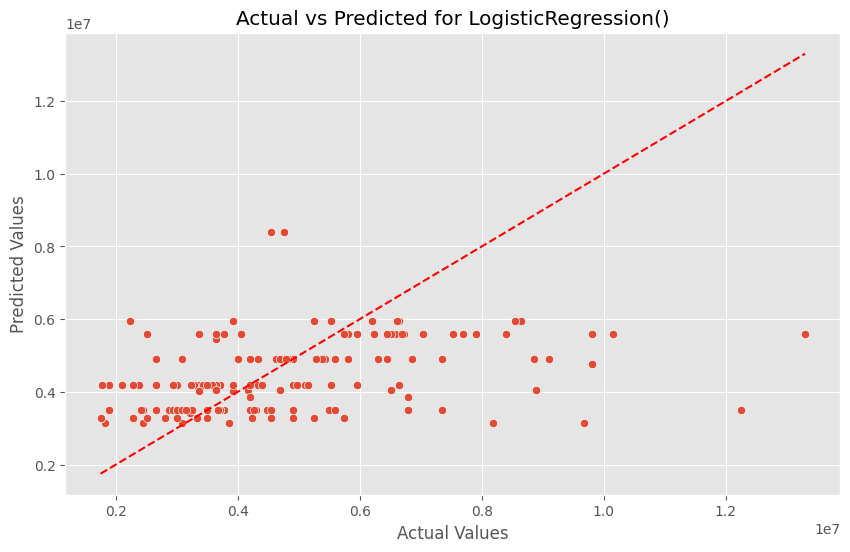

-------------Model DecisionTreeRegressor-------------
Accuracy --:  0.1890420898135765


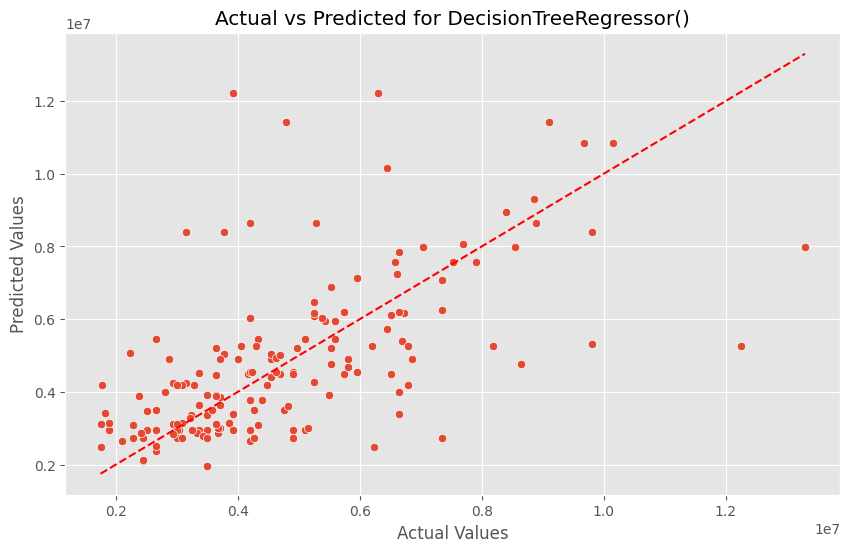

-------------Model RandomForestRegressor-------------
Accuracy --:  0.5621564946700461


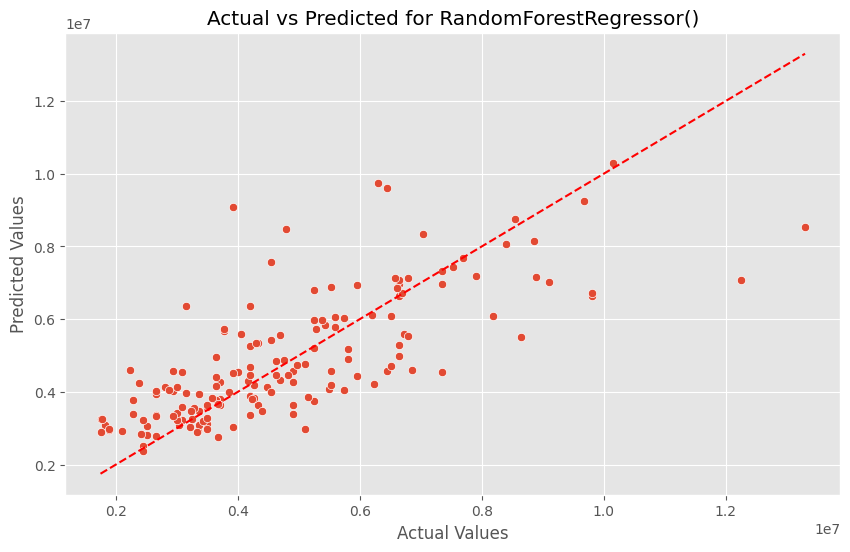

-------------Model GradientBoostingRegressor-------------
Accuracy --:  0.6282958708827953


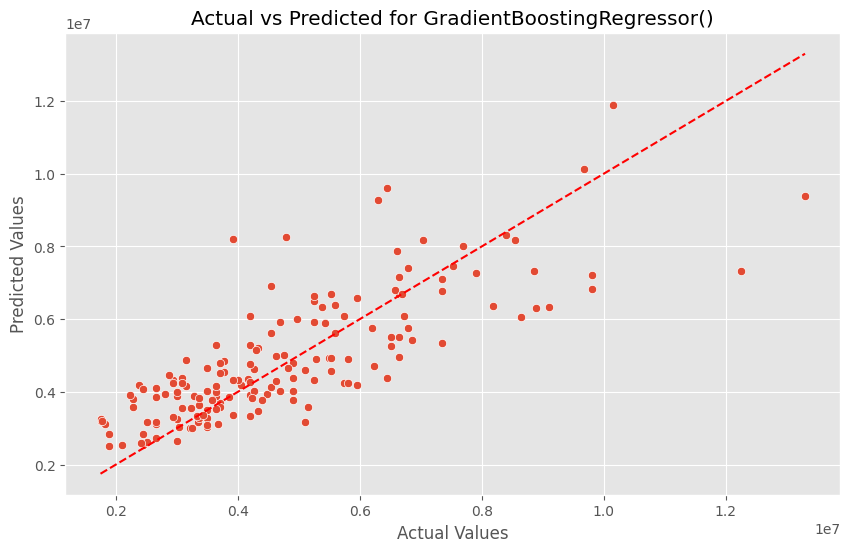

In [29]:
models = {
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = r2_score(y_test, y_pred)
    print(f'-------------Model {name}-------------')
    print('Accuracy --: ', acc_score)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted for {model}')
    plt.show()
